In [6]:
import torch
import data
import torchvision
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

mean = torch.tensor((0.2090, 0.1497, 0.1129)).reshape(-1, 1, 1)
std = torch.tensor((0.2601, 0.1899, 0.1538)).reshape(-1, 1, 1)

def tensor2imgs(t, n=8):
    imgrid = torchvision.utils.make_grid(t, n)
    return (imgrid.data * std + mean).cpu().numpy()

face_loader = data.get_dataset("FERG_expressions")

In [5]:
for x, y in tqdm(face_loader):
    print(torch.abs(x - ((x - mean)/std*std + mean)).max())

tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.9605e-08)
tensor(5.960

In [7]:
mean = torch.zeros(3)
std = torch.zeros(3)
N = 0

for x, y in tqdm(face_loader):
    nb_pixels = x.shape[0] * x.shape[2] * x.shape[3]
    
    mean = (mean * N + x.sum(dim=(0, 2, 3))) / (N + nb_pixels)
    std = (std * (N - 1) + (x**2).sum(dim=(0, 2, 3))) / (N + nb_pixels - 1)
    N += nb_pixels
    
std = torch.sqrt(std - mean**2)
    
print(mean)
print(std)

KeyboardInterrupt: 

In [ ]:
std = torch.zeros(3)
for x, y in tqdm(face_loader):
    std += x.mean(dim=-1).mean(dim=-1).mean(dim=0)/N
    
print(mean)

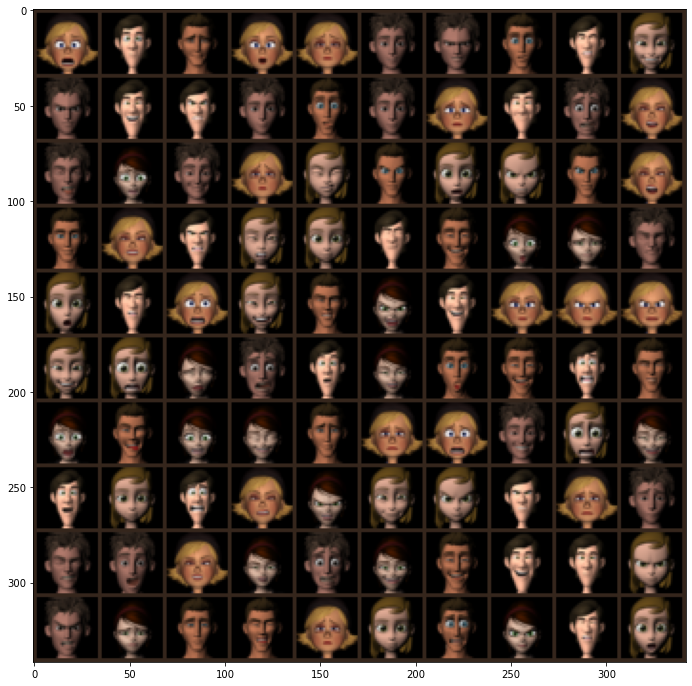

In [2]:
x, y = next(iter(face_loader))

plt.figure(figsize=(12, 12))
plt.imshow(tensor2imgs(x[:100], 10).transpose(1, 2, 0))

In [3]:
print(y)

tensor([2, 4, 5, 6, 5, 4, 0, 6, 1, 3, 0, 3, 0, 4, 6, 4, 5, 3, 2, 1, 1, 2, 3, 5,
        1, 0, 6, 0, 0, 1, 4, 1, 0, 1, 4, 1, 3, 6, 5, 1, 6, 1, 2, 3, 1, 0, 3, 4,
        0, 0, 3, 2, 5, 2, 6, 1, 6, 3, 2, 1, 2, 1, 2, 3, 5, 5, 2, 3, 2, 3, 6, 4,
        2, 1, 0, 3, 0, 0, 5, 5, 1, 6, 1, 1, 2, 3, 3, 3, 4, 0, 0, 5, 5, 1, 5, 4,
        2, 0, 1, 6, 3, 6, 6, 4, 4, 4, 5, 4, 0, 2, 1, 6, 6, 0, 0, 3, 0, 0, 0, 1,
        0, 3, 6, 6, 4, 2, 6, 6, 5, 5, 0, 4, 0, 6, 6, 1, 6, 5, 6, 4, 4, 0, 6, 4,
        6, 5, 2, 1, 2, 3, 1, 3, 3, 0, 3, 0, 6, 0, 0, 0, 0, 1, 6, 4, 0, 1, 4, 5,
        0, 0, 6, 2, 4, 0, 0, 1, 0, 0, 2, 4, 1, 6, 3, 6, 2, 6, 1, 5, 5, 3, 0, 2,
        4, 2, 0, 2, 6, 6, 3, 6, 5, 3, 4, 4, 2, 5, 6, 2, 2, 1, 5, 5, 0, 2, 0, 5,
        6, 4, 0, 5, 3, 3, 0, 3, 6, 1, 6, 1, 2, 0, 0, 3, 0, 6, 3, 2, 1, 1, 1, 6,
        5, 0, 4, 1, 6, 4, 6, 1, 2, 1, 5, 5, 3, 6, 6, 2, 6, 3, 0, 6, 5, 2, 6, 0,
        4, 0, 0, 2, 1, 2, 6, 2, 0, 1, 5, 4, 0, 1, 6, 6, 4, 2, 2, 0, 2, 5, 0, 1,
        0, 3, 3, 1, 2, 1, 2, 1, 4, 4, 5,